In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:


from matplotlib import pyplot as plt
from matplotlib import image as mpimg

In [ ]:

%cd /content/drive/MyDrive



/content/drive/MyDrive


In [ ]:
!git clone https://github.com/ultralytics/yolov5  # clone
%cd yolov5
%pip install -qr requirements.txt comet_ml  # install

import torch
import utils
display = utils.notebook_init()  # checks

YOLOv5 🚀 v7.0-224-g6262c7f Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)


Setup complete ✅ (2 CPUs, 12.7 GB RAM, 27.1/78.2 GB disk)


# 1. Detect

`detect.py` runs YOLOv5 inference on a variety of sources, downloading models automatically from the [latest YOLOv5 release](https://github.com/ultralytics/yolov5/releases), and saving results to `runs/detect`. Example inference sources are:

```shell
python detect.py --source 0  # webcam
                          img.jpg  # image
                          vid.mp4  # video
                          screen  # screenshot
                          path/  # directory
                         'path/*.jpg'  # glob
                         'https://youtu.be/Zgi9g1ksQHc'  # YouTube
                         'rtsp://example.com/media.mp4'  # RTSP, RTMP, HTTP stream
```

In [ ]:
!python detect.py --weights /content/drive/MyDrive/yolov5/runs/train/exp3/weights/best.pt --img 640 --conf 0.7 --source /content/drive/MyDrive/ethan-hoover-0YHIlxeCuhg-unsplash.jpg

detect: weights=['/content/drive/MyDrive/yolov5/runs/train/exp3/weights/best.pt'], source=/content/drive/MyDrive/ethan-hoover-0YHIlxeCuhg-unsplash.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.7, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-224-g6262c7f Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 157 layers, 7020913 parameters, 0 gradients, 15.8 GFLOPs
image 1/1 /content/drive/MyDrive/ethan-hoover-0YHIlxeCuhg-unsplash.jpg: 448x640 (no detections), 46.3ms
Speed: 0.7ms pre-process, 46.3ms inference, 9.4ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp8


In [ ]:
# Download COCO val
torch.hub.download_url_to_file('https://ultralytics.com/assets/coco2017val.zip', 'tmp.zip')  # download (780M - 5000 images)
!unzip -q tmp.zip -d ../datasets && rm tmp.zip  # unzip

In [ ]:
# Validate YOLOv5s on COCO val
!python val.py --weights yolov5s.pt --data coco.yaml --img 640 --half

# 3. Train

<p align=""><a href="https://bit.ly/ultralytics_hub"><img width="1000" src="https://github.com/ultralytics/assets/raw/main/im/integrations-loop.png"/></a></p>
Close the active learning loop by sampling images from your inference conditions with the `roboflow` pip package
<br><br>

Train a YOLOv5s model on the [COCO128](https://www.kaggle.com/ultralytics/coco128) dataset with `--data coco128.yaml`, starting from pretrained `--weights yolov5s.pt`, or from randomly initialized `--weights '' --cfg yolov5s.yaml`.

- **Pretrained [Models](https://github.com/ultralytics/yolov5/tree/master/models)** are downloaded
automatically from the [latest YOLOv5 release](https://github.com/ultralytics/yolov5/releases)
- **[Datasets](https://github.com/ultralytics/yolov5/tree/master/data)** available for autodownload include: [COCO](https://github.com/ultralytics/yolov5/blob/master/data/coco.yaml), [COCO128](https://github.com/ultralytics/yolov5/blob/master/data/coco128.yaml), [VOC](https://github.com/ultralytics/yolov5/blob/master/data/VOC.yaml), [Argoverse](https://github.com/ultralytics/yolov5/blob/master/data/Argoverse.yaml), [VisDrone](https://github.com/ultralytics/yolov5/blob/master/data/VisDrone.yaml), [GlobalWheat](https://github.com/ultralytics/yolov5/blob/master/data/GlobalWheat2020.yaml), [xView](https://github.com/ultralytics/yolov5/blob/master/data/xView.yaml), [Objects365](https://github.com/ultralytics/yolov5/blob/master/data/Objects365.yaml), [SKU-110K](https://github.com/ultralytics/yolov5/blob/master/data/SKU-110K.yaml).
- **Training Results** are saved to `runs/train/` with incrementing run directories, i.e. `runs/train/exp2`, `runs/train/exp3` etc.
<br>

A **Mosaic Dataloader** is used for training which combines 4 images into 1 mosaic.

## Label a dataset on Roboflow (optional)

[Roboflow](https://roboflow.com/?ref=ultralytics) enables you to easily **organize, label, and prepare** a high quality dataset with your own custom data. Roboflow also makes it easy to establish an active learning pipeline, collaborate with your team on dataset improvement, and integrate directly into your model building workflow with the `roboflow` pip package.

In [ ]:
# Train YOLOv5s on COCO128 for 100 epochs
!python train.py --img 640 --batch 16 --epochs 100 --data /content/drive/MyDrive/yolov5/data/custom_data.yaml --weights yolov5s.pt --cache

2023-11-07 12:12:04.685920: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-07 12:12:04.685977: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-07 12:12:04.686024: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
train: weights=yolov5s.pt, cfg=, data=/content/drive/MyDrive/yolov5/data/custom_data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=100, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer

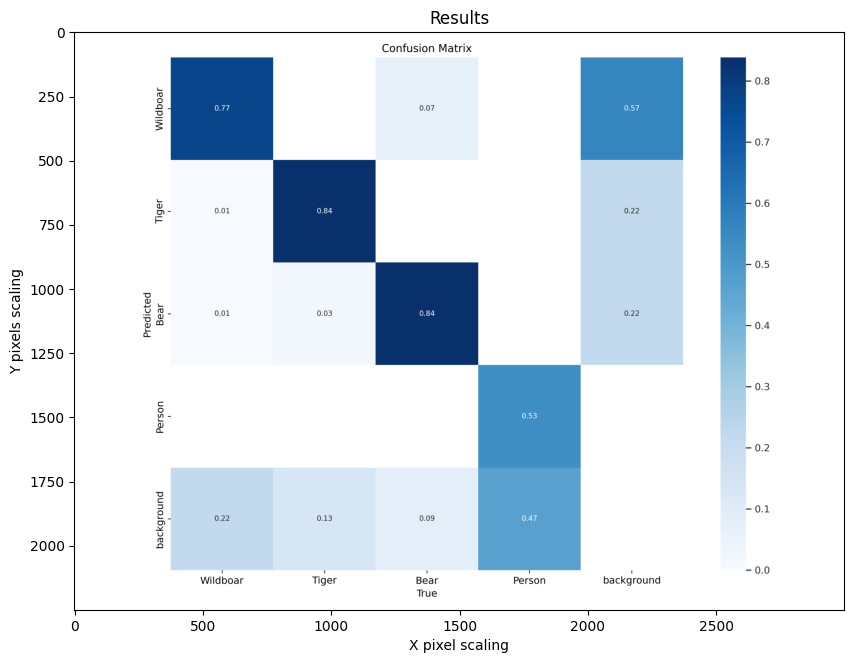

In [ ]:



# Set the desired width (in inches)
desired_width = 10

# Read the image
image = mpimg.imread("/content/drive/MyDrive/yolov5/runs/train/exp4/confusion_matrix.png")

# Create a figure with the desired width
plt.figure(figsize=(desired_width, image.shape[0] * (desired_width / image.shape[1])))

# Plot the image
plt.title("Results")
plt.xlabel("X pixel scaling")
plt.ylabel("Y pixels scaling")
plt.imshow(image)
plt.show()

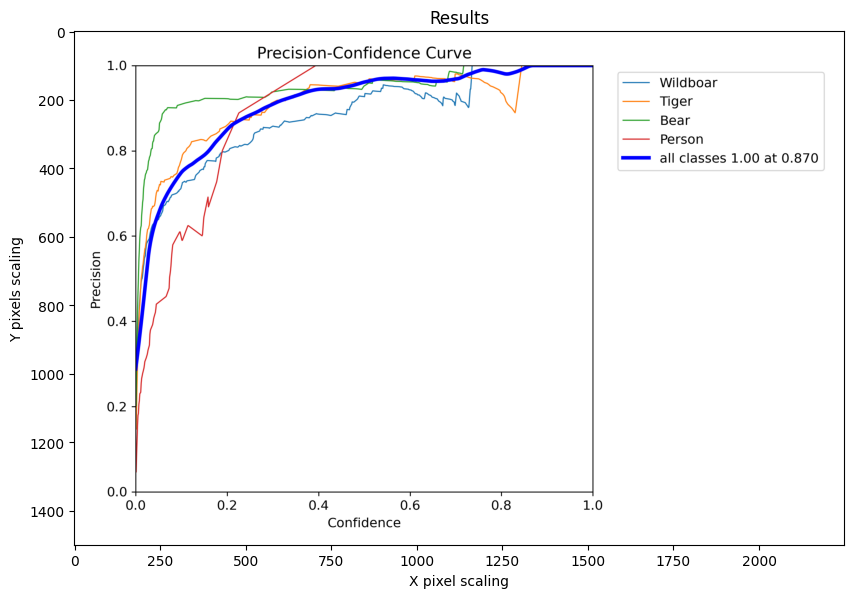

In [ ]:


# Set the desired width (in inches)
desired_width = 10

# Read the image
image = mpimg.imread("/content/drive/MyDrive/yolov5/runs/train/exp4/P_curve.png")

# Create a figure with the desired width
plt.figure(figsize=(desired_width, image.shape[0] * (desired_width / image.shape[1])))

# Plot the image
plt.title("Results")
plt.xlabel("X pixel scaling")
plt.ylabel("Y pixels scaling")
plt.imshow(image)
plt.show()

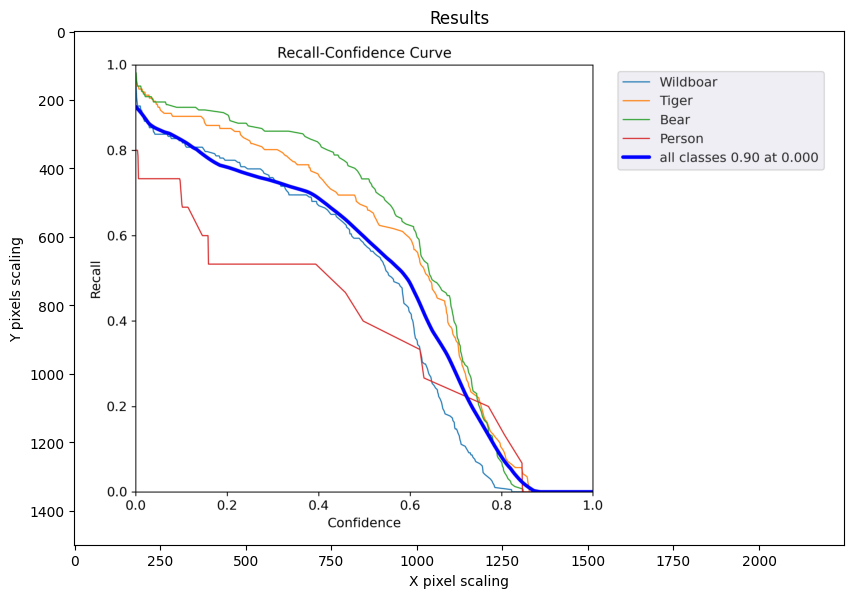

In [ ]:



# Set the desired width (in inches)
desired_width = 10

# Read the image
image = mpimg.imread("/content/drive/MyDrive/yolov5/runs/train/exp4/R_curve.png")

# Create a figure with the desired width
plt.figure(figsize=(desired_width, image.shape[0] * (desired_width / image.shape[1])))

# Plot the image
plt.title("Results")
plt.xlabel("X pixel scaling")
plt.ylabel("Y pixels scaling")
plt.imshow(image)
plt.show()


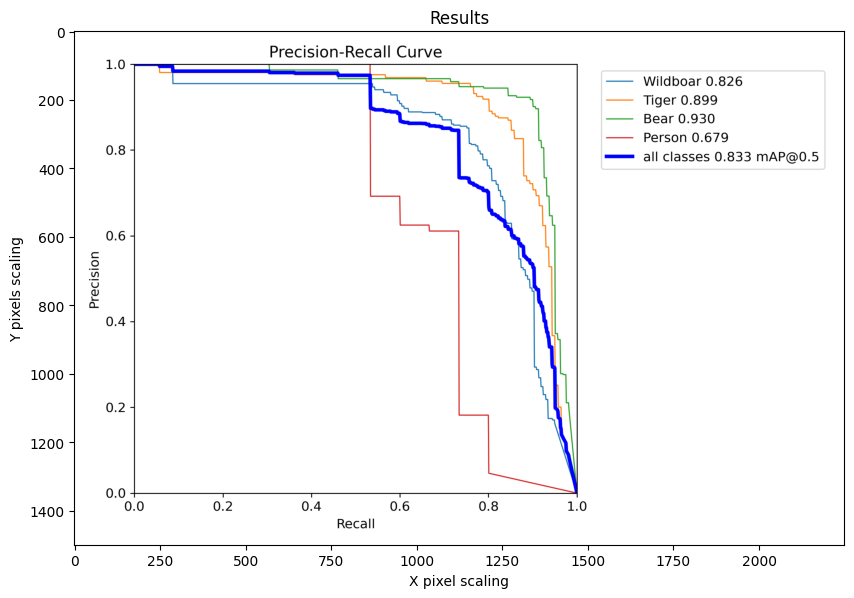

In [ ]:



# Set the desired width (in inches)
desired_width = 10

# Read the image
image = mpimg.imread("/content/drive/MyDrive/yolov5/runs/train/exp4/PR_curve.png")

# Create a figure with the desired width
plt.figure(figsize=(desired_width, image.shape[0] * (desired_width / image.shape[1])))

# Plot the image
plt.title("Results")
plt.xlabel("X pixel scaling")
plt.ylabel("Y pixels scaling")
plt.imshow(image)
plt.show()

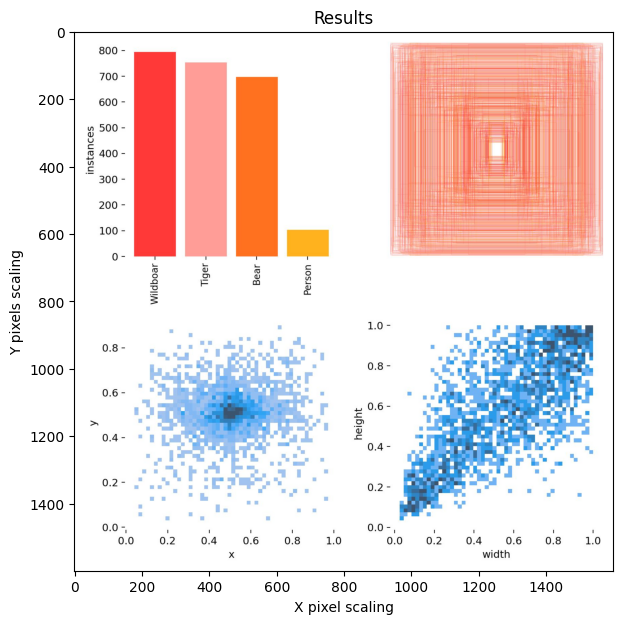

In [ ]:



# Set the desired width (in inches)
desired_width = 7

# Read the image
image = mpimg.imread("/content/drive/MyDrive/yolov5/runs/train/exp4/labels.jpg")

# Create a figure with the desired width
plt.figure(figsize=(desired_width, image.shape[0] * (desired_width / image.shape[1])))

# Plot the image
plt.title("Results")
plt.xlabel("X pixel scaling")
plt.ylabel("Y pixels scaling")
plt.imshow(image)
plt.show()

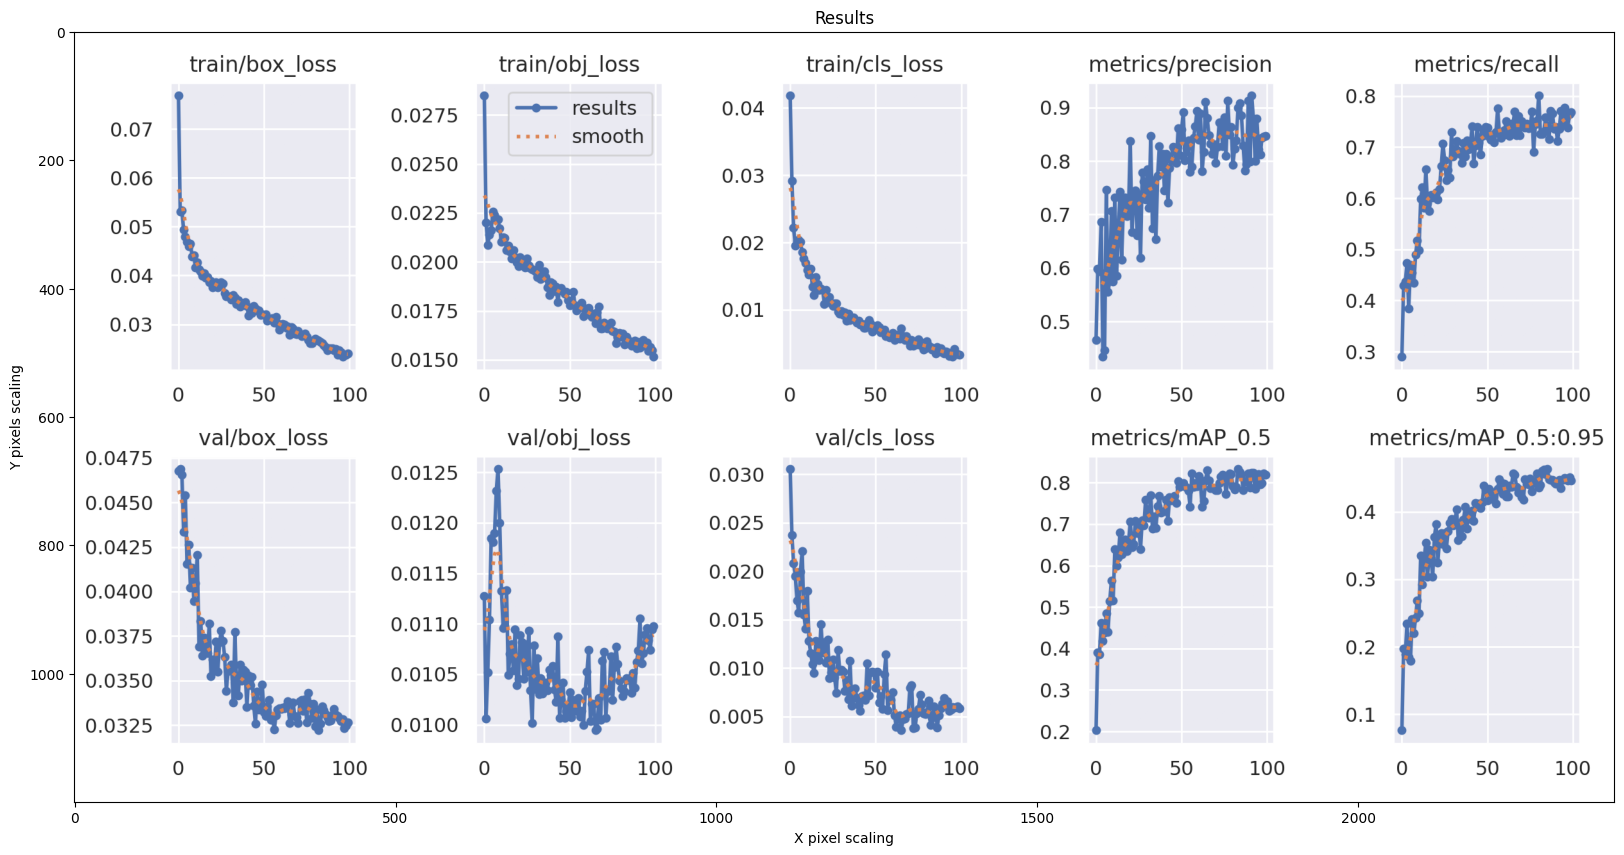

In [ ]:


# Set the desired width (in inches)
desired_width = 20

# Read the image
image = mpimg.imread("/content/drive/MyDrive/yolov5/runs/train/exp4/results.png")

# Create a figure with the desired width
plt.figure(figsize=(desired_width, image.shape[0] * (desired_width / image.shape[1])))

# Plot the image
plt.title("Results")
plt.xlabel("X pixel scaling")
plt.ylabel("Y pixels scaling")
plt.imshow(image)
plt.show()

In [ ]:


# Set the desired width (in inches)
desired_width = 18

# Read the image
image = mpimg.imread("/content/drive/MyDrive/yolov5/runs/train/exp4/val_batch1_pred.jpg")

# Create a figure with the desired width
plt.figure(figsize=(desired_width, image.shape[0] * (desired_width / image.shape[1])))

# Plot the image
plt.title("Results")
plt.xlabel("X pixel scaling")
plt.ylabel("Y pixels scaling")
plt.imshow(image)
plt.show()


Output hidden; open in https://colab.research.google.com to view.

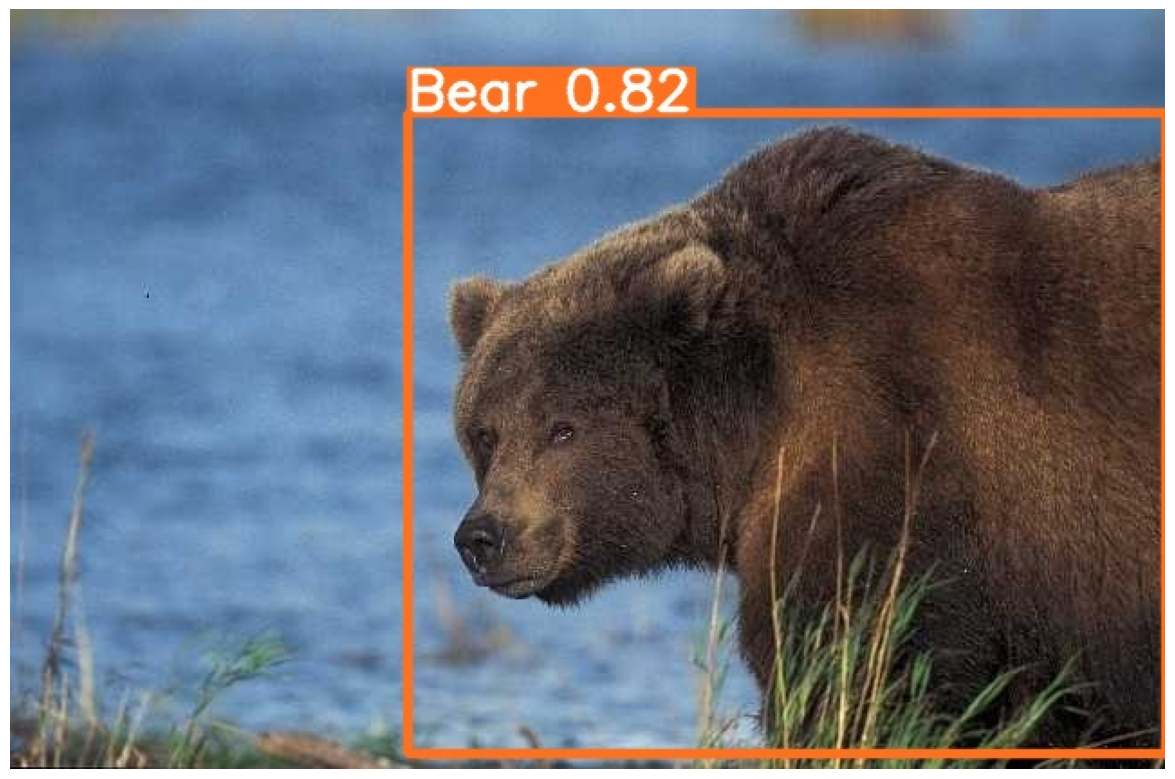

In [ ]:
# Set the desired width (in inches)
desired_width = 15

# Read the image
image = mpimg.imread("/content/drive/MyDrive/yolov5/runs/detect/exp/0EKWKLT9TQ01.jpg")

# Create a figure with the desired width
plt.figure(figsize=(desired_width, image.shape[0] * (desired_width / image.shape[1])))

# Plot the image
plt.axis('off')
plt.imshow(image)
plt.show()

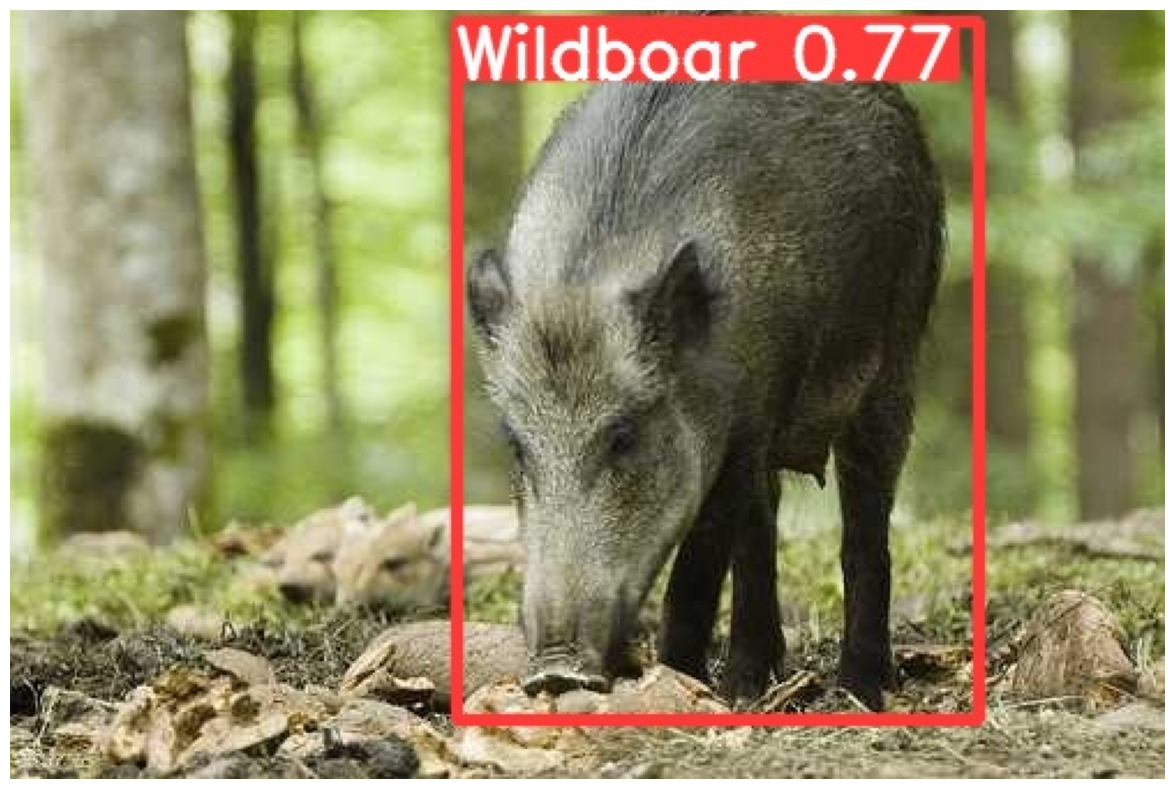

In [ ]:
# Set the desired width (in inches)
desired_width = 15

# Read the image
image = mpimg.imread("/content/drive/MyDrive/yolov5/runs/detect/exp3/1J9T8AN9TJUI.jpg")

# Create a figure with the desired width
plt.figure(figsize=(desired_width, image.shape[0] * (desired_width / image.shape[1])))

# Plot the image

plt.axis('off')
plt.imshow(image)
plt.show()

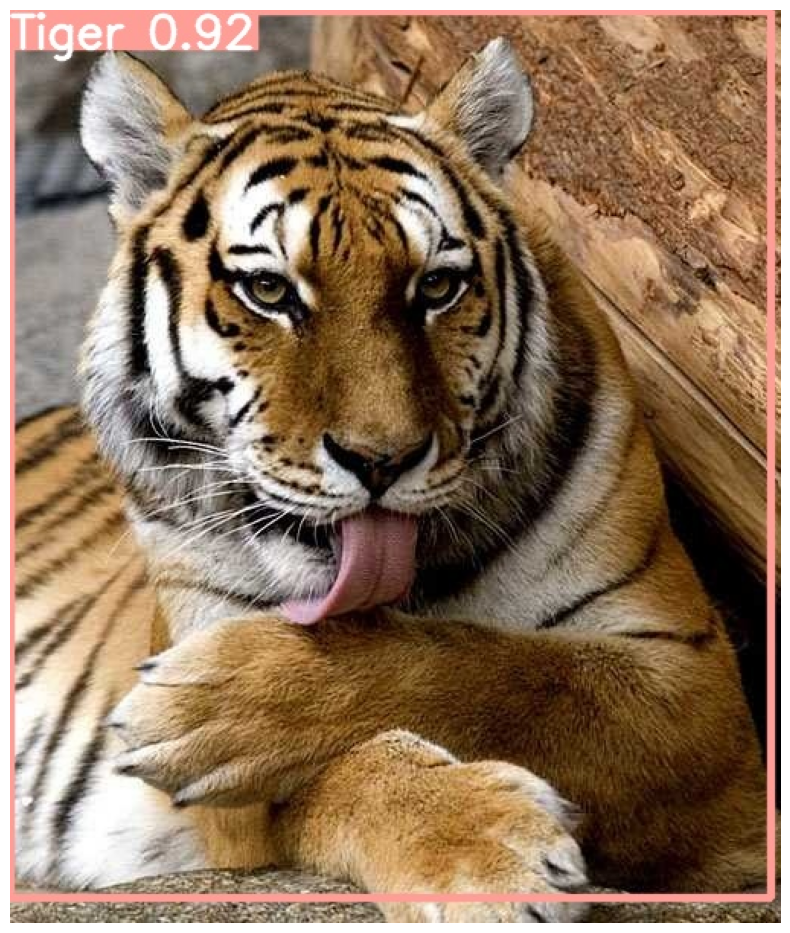

In [ ]:
# Set the desired width (in inches)
desired_width = 10

# Read the image
image = mpimg.imread("/content/drive/MyDrive/yolov5/runs/detect/exp5/1RJJJTWFTFIX.jpg")

# Create a figure with the desired width
plt.figure(figsize=(desired_width, image.shape[0] * (desired_width / image.shape[1])))

# Plot the image

plt.axis('off')
plt.imshow(image)
plt.show()